## Working on Decorators

To have better understanding of **Decorators** its useful to have info about the three sub-topics:
* **Nested Functions**
* **Pass functions as arguments**
* **Return function as value**

We'll check above examples first; before proceeding with decorators

In [1]:
## nested function
def outer(x):
    def inner(y):
        return x+y
    return inner

In [2]:
add_five = outer(5)
result = add_five(6)
print(result)

11


In [3]:
# passing the func as an argument
def add(x,y):
    return x+y

def calculate(func,x,y):
    return func(x,y)

result = calculate(add, 5,6)
print(result)

11


In [4]:
# return function as a value

def greeting(name):
    def hello():
        return "Hello, "+name+"!"
    return hello

greet = greeting("John")
greet()


'Hello, John!'

In [5]:
def first_decorator(func):
    def warpper_func():
        print("code running before calling the func")
        result = func()
        print("code running after calling the func")
        return result
        
    return warpper_func

In [6]:
def method():
    return "outside method is called"

In [7]:
obj= first_decorator(method)

In [9]:
obj()

code running before calling the func
code running after calling the func


'outside method is called'

This is the way we are calling the decorator explicitly.

A more easy and readable way would be using the **pie** syntax

In [10]:
@first_decorator
def method():
    return "outside method is called"


In [11]:
obj2 = method()
obj2

code running before calling the func
code running after calling the func


'outside method is called'

In [12]:
# above is the decorator example without the parameters
# Now we'll se how to pass the parameters as well in the decorators

def divide_number(func):
    def inner(a,b):
        print(f"I am going to divide {a} and {b}")
        if b==0:
            print("Wrong number entered thus can't divide!!")
            return
    

        return func(a,b)
    return inner

In [13]:
@divide_number
def divide(a,b):
    return a/b

In [14]:
divide(5,6)

I am going to divide 5 and 6


0.8333333333333334

In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# to use decorators for styling purposes that make the code more efficient
# this helps in automatically set themes or other configs of the plot

def set_style_plot(style):
    def decorator(func):
        def wrapper(*args,**kwargs):
            original_style = plt.rcParams['figure.figsize']
            plt.style.use(style)
            figsize = kwargs.pop('figsize',(10,6)) #this is the default value that has been set 
            plt.figure(figsize=figsize)
            result = func(*args,**kwargs)
            plt.style.use('default')
            plt.rcParams['figure.figsize']= original_style
            return result
        return wrapper
    return decorator

In [17]:
@set_style_plot("ggplot")
def create_plot(data,**kwargs):
    plt.plot(data)
    plt.show()

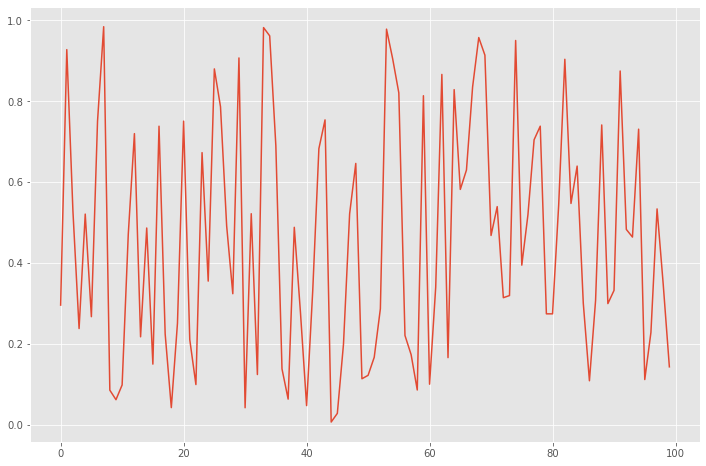

In [18]:
random_data = np.random.rand(100)
create_plot(random_data,figsize=(12,8))

In [19]:
import time

In [20]:
# we'll see how to use the decorators for caching/memoization. 
# why? because in data preprocessing, we perform expensive computation that we don't want to repeat
# so here is an example of getting the average value of the dataset we have. Thus every time it is not require to run the computation. Once it is done
# then we can use the cache memory.

def memoize(func):
    cache={}
    def wrapper(*args):
        if args in cache:
            return cache[args]
        result = func(*args)
        cache[args]=result
        return result
    return wrapper

In [21]:
@memoize
def expensive_processing(data):
    time.sleep(2)
    return sum(data)/len(data)

In [22]:
data1 = [1, 2, 3, 4, 5]
data2 = [4, 5, 6]

In [23]:
start_time = time.time()
result = expensive_processing(tuple(data1))
end_time = time.time()

print(f"first call for data1 {end_time - start_time:.2f} seconds, result: {result}")

first call for data1 2.00 seconds, result: 3.0


In [24]:
start_time = time.time()
result = expensive_processing(tuple(data1))
end_time = time.time()

print(f"second call for data1 {end_time - start_time:.2f} seconds, result: {result}")

second call for data1 0.00 seconds, result: 3.0
